# <font color="orange"> Bike Sharing Linear Regression Machine Model </font>

### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### Essentially, the company wants to know - 
* The factors/features affecting the demand
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands



### Business Goal:
Build a linear regression machine learning model to predict the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Steps followed to build the model
1. Reading, understanding, visualizing, imputing and removing the data if required and adding new metrics
2. Preparing the data for modelling(Train-Test split, Rescaling)
3. Training the model
4. Residual analysis
5. Prediction and evaluation on the test set

### Step 1: Reading, understanding and visualizing the data

Import numpy and pandas and read the data

<u>Note:</u> For better readability of the code, all the import package statements are included in the begining of the code

In [1]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import sweetviz as sv
import scipy
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

print('library - ', pd.__name__,' version ' ,pd.__version__)
print('library - ',np.__name__,' version ',np.__version__)
print('library - ',sns.__name__,' version ',sns.__version__)
print('library - ',matplotlib.__name__,' version ',matplotlib.__version__)
print('library - ', sklearn.__name__,' version ' ,sklearn.__version__)
print('library - ',statsmodels.__name__,' version ',statsmodels.__version__)
print('library - ',sv.__name__,' version ',sv.__version__)
print('library - ',scipy.__name__,' version ',scipy.__version__)
print('library - ',warnings.__name__)



library -  pandas  version  1.4.3
library -  numpy  version  1.21.5
library -  seaborn  version  0.11.2
library -  matplotlib  version  3.5.2
library -  sklearn  version  1.1.1
library -  statsmodels  version  0.13.2
library -  sweetviz  version  2.1.4
library -  scipy  version  1.7.3
library -  warnings


In [2]:

# read and understan data, check shape and data types
pd.options.display.max_columns = None
pd.options.display.max_rows = None
bike_sharing = pd.read_csv("/Users/charanhulmani/Desktop/UpGrad/MSc-IITB & LJMU/Case Study/BikeSharingPredictiveModel/day.csv")
print(bike_sharing.shape, '\n')
print(bike_sharing.info(), '\n')
bike_sharing.head(15)


(730, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None 



instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1  01-01-2018       1   0     1        0        6           0   
1         2  02-01-2018       1   0     1        0        0           0   
2         3  03-01-2018       1   0     1        0        1           1   
3         4  04-01-2018       1   0     1        0        2           1   
4         5  05-01-2018       1   0     1        0        3           1   
5         6  06-01-2018       1   0     1        0        4           1   
6         7  07-01-2018       1   0     1        0        5           1   
7         8  08-01-2018       1   0     1        0        6           0   
8         9  09-01-2018       1   0     1        0        0           0   
9        10  10-01-2018       1   0     1        0        1           1   
10       11  11-01-2018       1   0     1        0        2           1   
11       12  12-01-2018       1   0     1        0        3           1   
12       13  13-01-2018       1   0     1        0        4           1   
13       14  14-01-2018       1   0     1        0        5           1   
14       15  15-01-2018       1   0     1        0        6           0   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0            2  14.110847  18.18125  80.5833  10.749882     331         654   
1            2  14.902598  17.68695  69.6087  16.652113     131         670   
2            1   8.050924   9.47025  43.7273  16.636703     120        1229   
3            1   8.200000  10.60610  59.0435  10.739832     108        1454   
4            1   9.305237  11.46350  43.6957  12.522300      82        1518   
5            1   8.378268  11.66045  51.8261   6.000868      88        1518   
6            2   8.057402  10.44195  49.8696  11.304642     148        1362   
7            2   6.765000   8.11270  53.5833  17.875868      68         891   
8            1   5.671653   5.80875  43.4167  24.250650      54         768   
9            1   6.184153   7.54440  48.2917  14.958889      41        1280   
10           2   6.932731   9.57320  68.6364   8.182844      43        1220   
11           1   7.081807   8.02365  59.9545  20.410009      25        1137   
12           1   6.765000   7.54415  47.0417  20.167000      38        1368   
13           1   6.595670   9.42065  53.7826   8.478716      54        1367   
14           2   9.566653  12.40560  49.8750  10.583521     222        1026   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248

### <font color = 'green' size = 4> There are no missing values and we do not need to impute or remove any data </font>

In [3]:

# Remove duplicates if present and quick check of the data statistics
bike_sharing.drop_duplicates(inplace = True)
bike_sharing.describe()


instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### <font color = 'green' size = 4> There are no duplicates in the data, which we can say from the count of records before dropping duplicates and aftre </font>

In [4]:

# Remove 'instant' as it is just representing row number of the data and wouldn't help in building the model,
# and it doesn't have any direct impact with target variable 'cnt'
bike_sharing.drop(columns = ['instant'], axis = 1, inplace = True)

# Convert 'dteday' to date 
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'], format = '%d-%m-%Y')

# Transform 'yr' column to represent the actual year 
bike_sharing['yr'] = bike_sharing['yr'].apply(lambda x : 2018 if x == 0 else 2019)

# Add new metric to understand the ratio of humidity with temperature,  ratio of windspeed with temperature 
bike_sharing['ratio_hum_temp'] = bike_sharing['hum'] / bike_sharing['temp']
bike_sharing['ratio_windspeed_temp'] = bike_sharing['windspeed'] / bike_sharing['temp']

bike_sharing.head()


dteday  season    yr  mnth  holiday  weekday  workingday  weathersit  \
0 2018-01-01       1  2018     1        0        6           0           2   
1 2018-01-02       1  2018     1        0        0           0           2   
2 2018-01-03       1  2018     1        0        1           1           1   
3 2018-01-04       1  2018     1        0        2           1           1   
4 2018-01-05       1  2018     1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985   
1  14.902598  17.68695  69.6087  16.652113     131         670   801   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600   

   ratio_hum_temp  ratio_windspeed_temp  
0        5.710734              0.761817  
1        4.670910              1.117397  
2        5.431339              2.066434  
3        7.200427              1.309736  
4        4.695818              1.345726

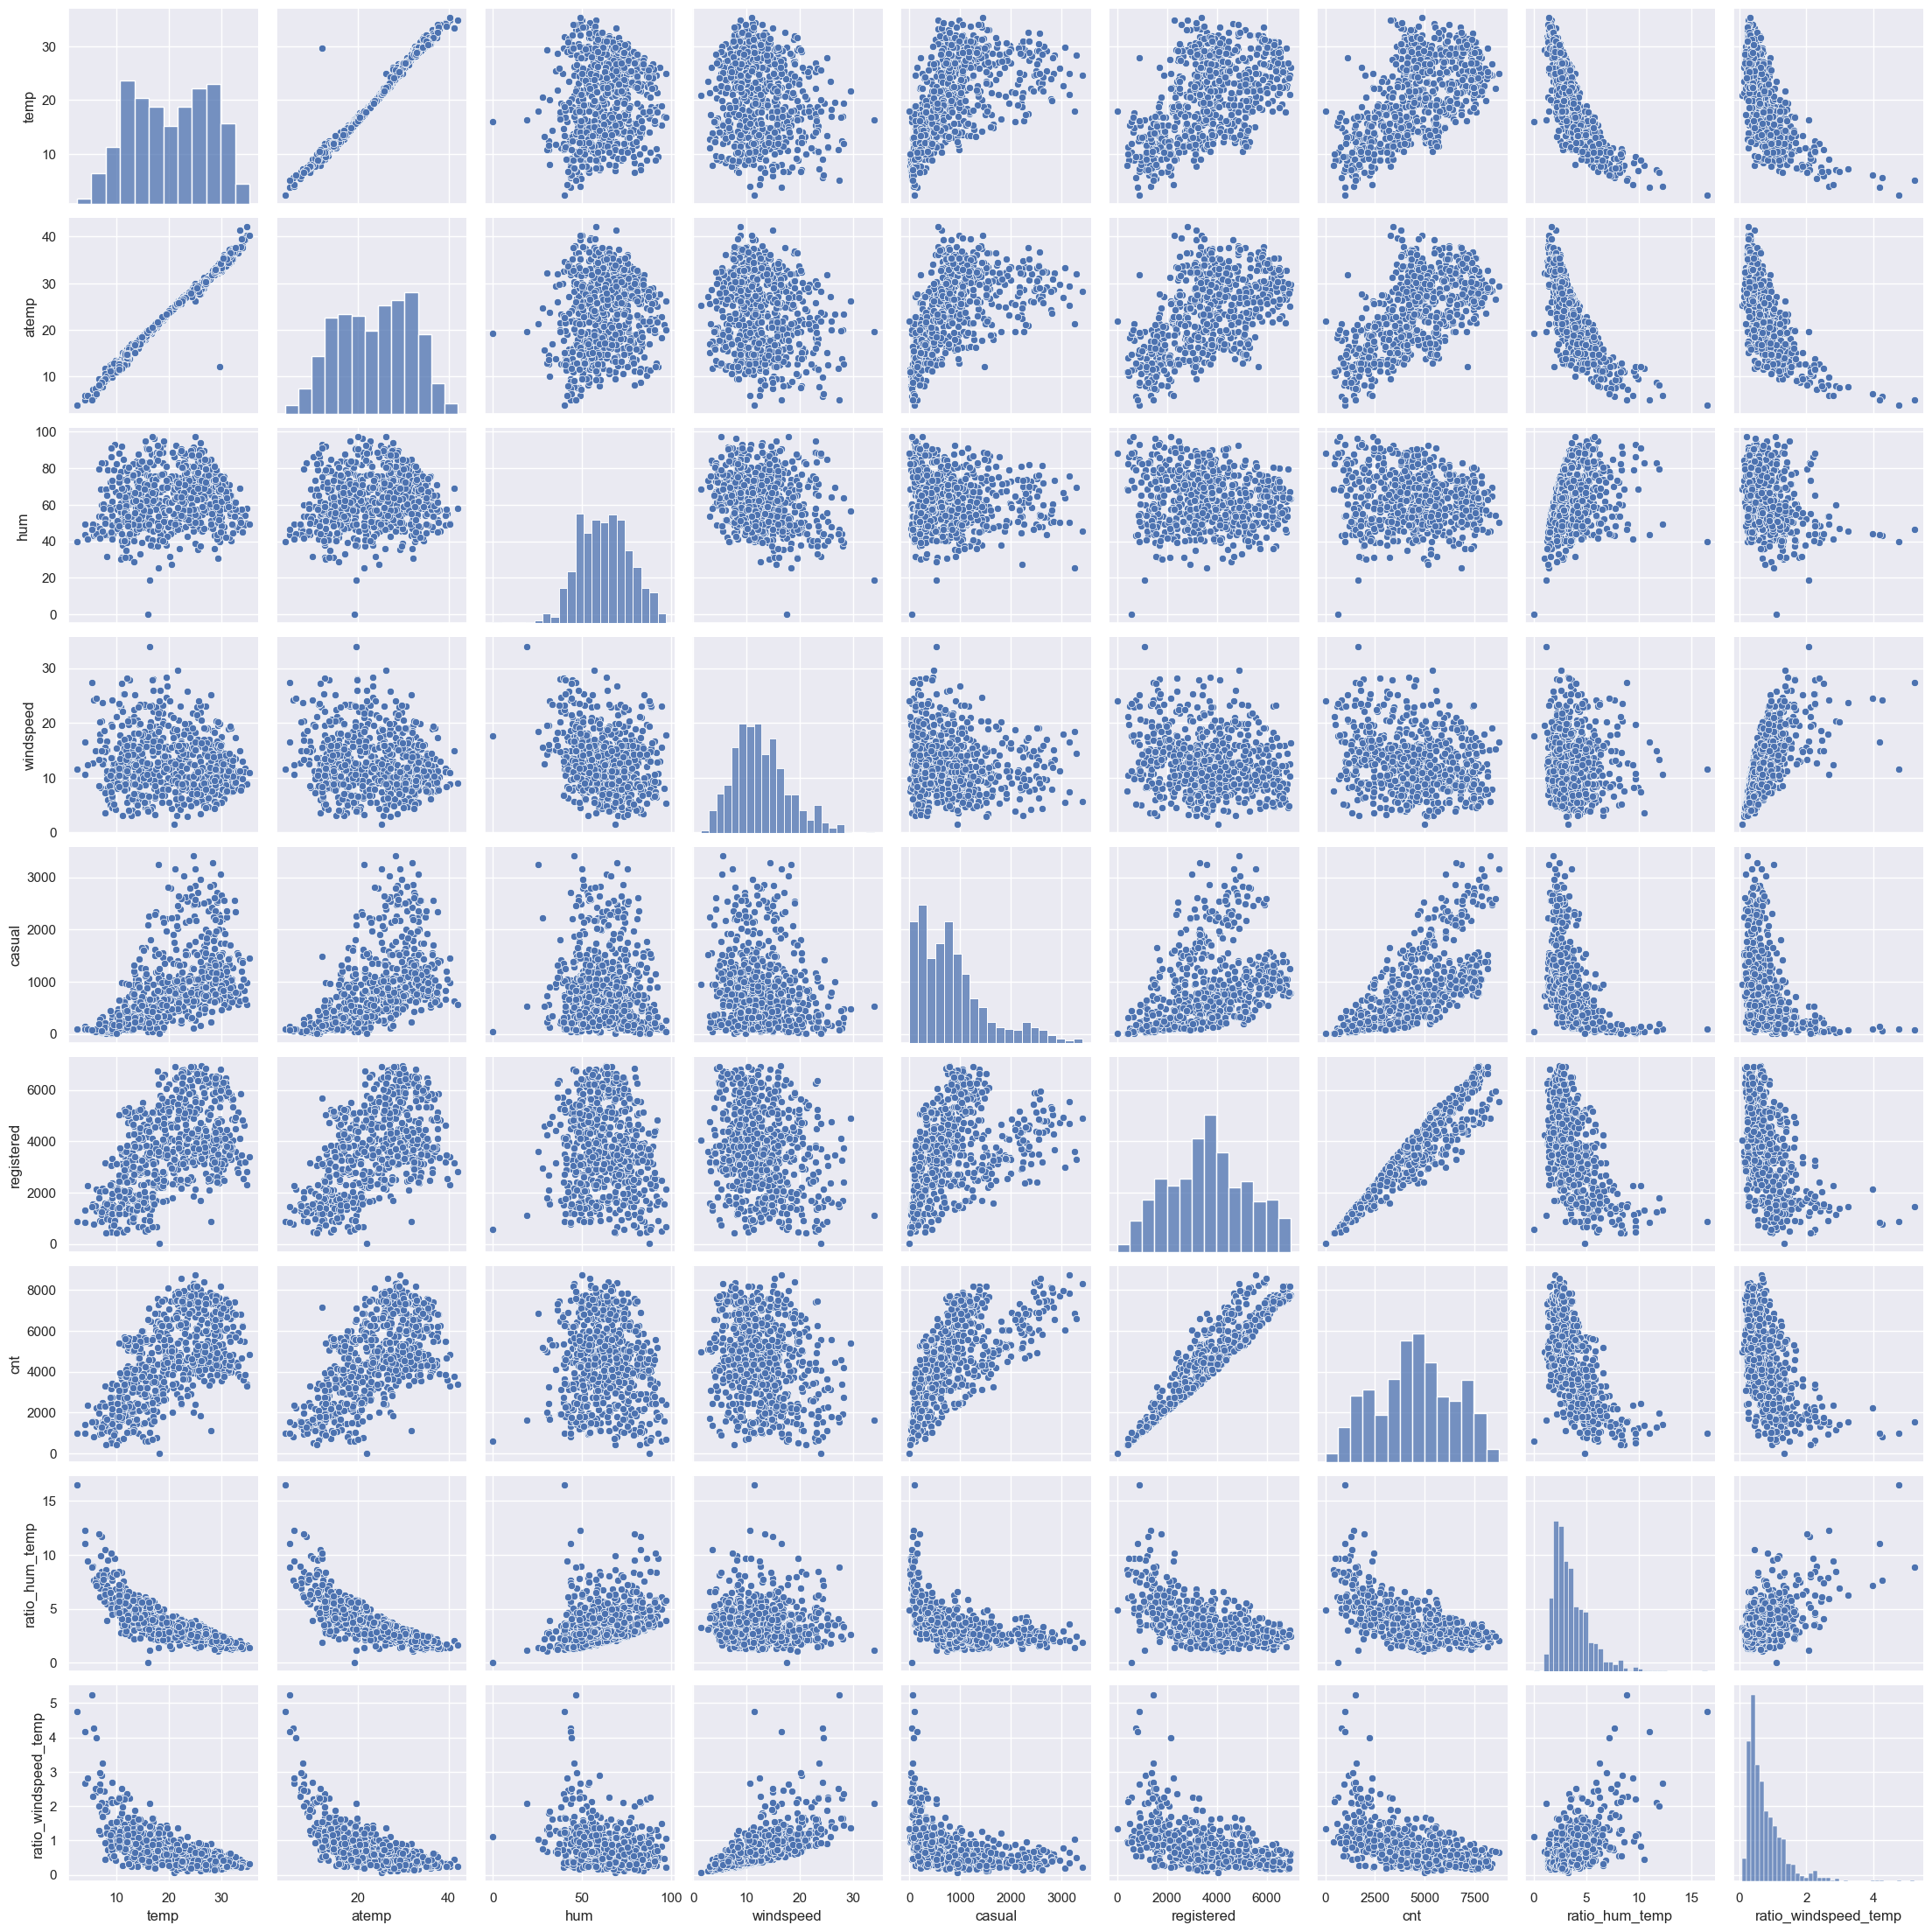

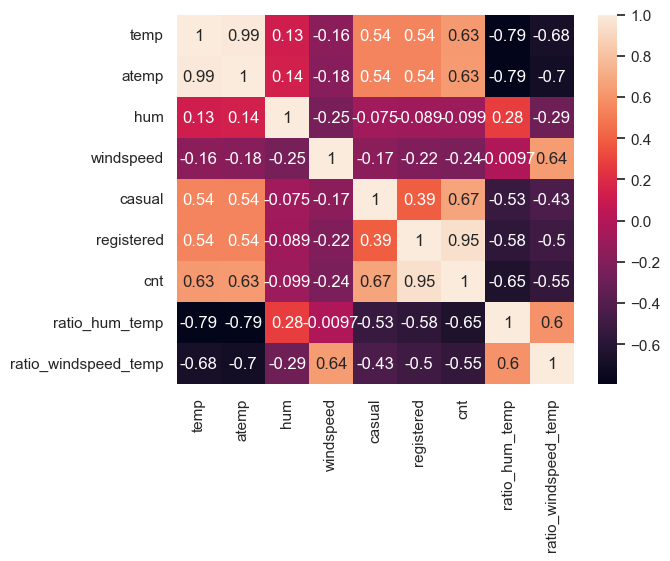

In [5]:

# Visualize data:  Independent variables against the target variable(cnt)

# Visualize continuous features using pairplots. We can see the scatter plots and histograms of feature.
features_for_plotting = ['temp','atemp','hum','windspeed','casual','registered','cnt','ratio_hum_temp','ratio_windspeed_temp']
sns.set(font_scale = 1)
sns.pairplot(bike_sharing[features_for_plotting])
plt.show()


sns.heatmap(bike_sharing[features_for_plotting].corr(), annot=True )
plt.show()



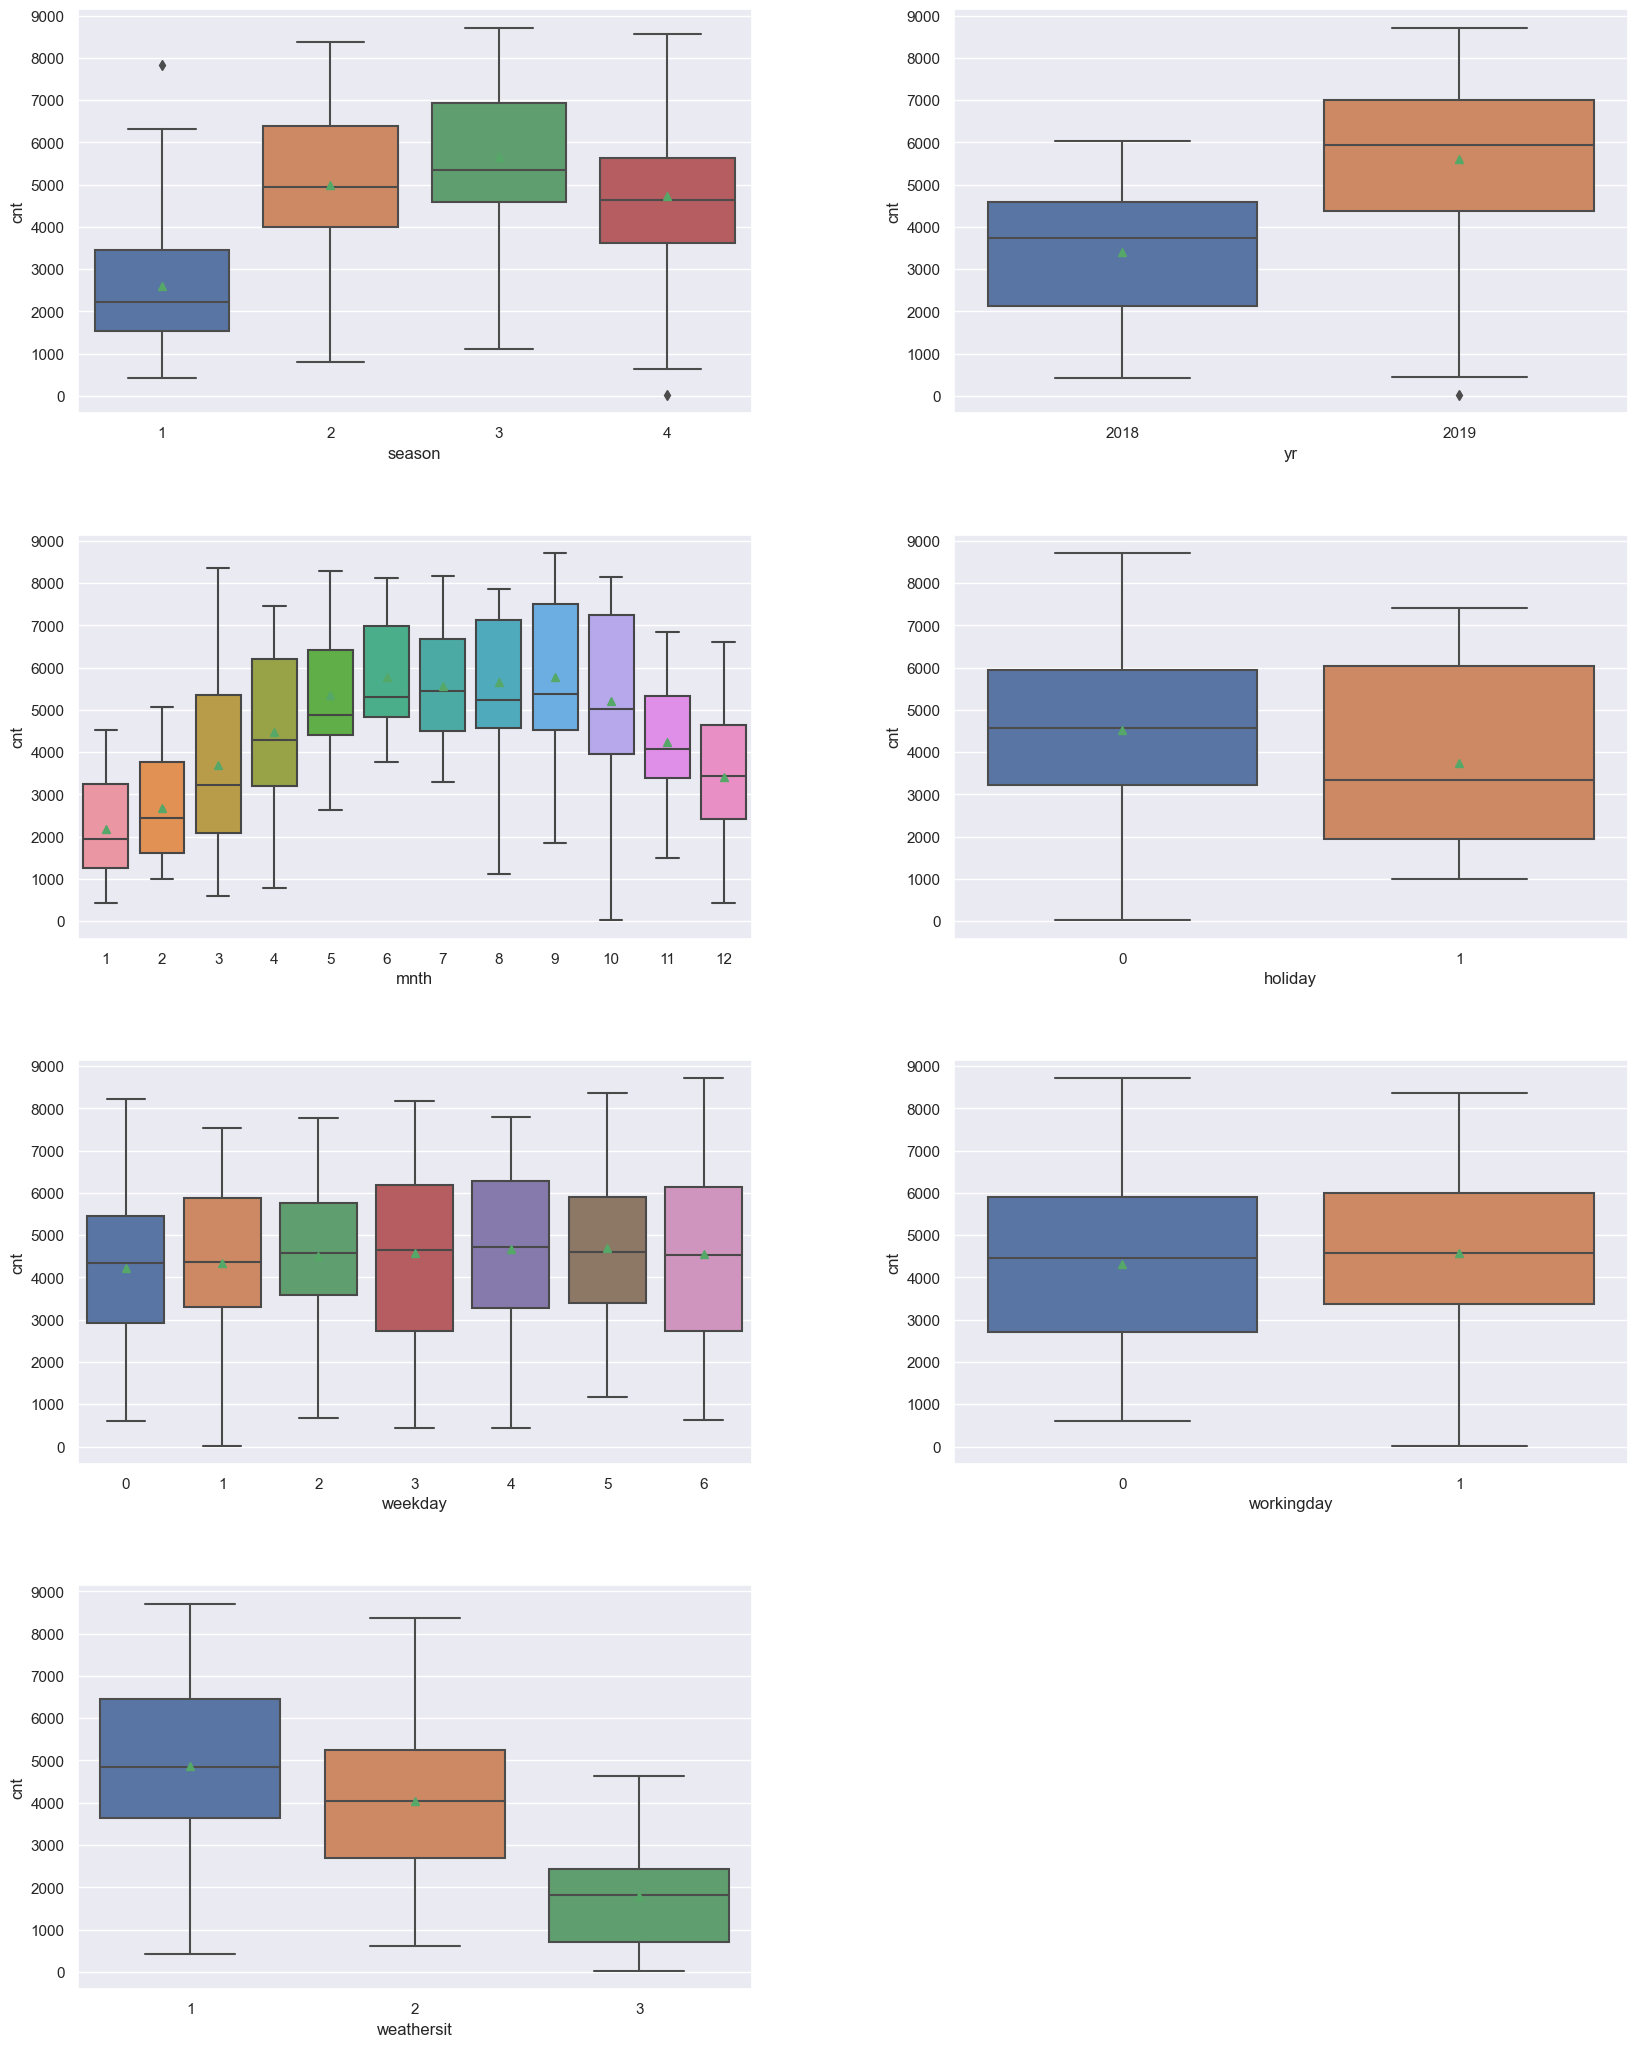

cnt
mnth             
1     2176.338710
2     2669.964286
12    3403.806452
3     3692.258065
11    4247.183333
4     4484.900000
10    5199.225806
5     5349.774194
7     5563.677419
8     5664.419355
9     5766.516667
6     5772.366667

In [6]:

features_for_plotting = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
fig, axs = plt.subplots(4,2, figsize = (20,20))
plt.subplots_adjust(top = 1, bottom = 0.01, hspace = 0.3, wspace = 0.3)
axs = axs.ravel()
fig.delaxes(axs[7])
yticks = [ i for i in range(0,10000,1000)]
for i, feature in enumerate(features_for_plotting):
    ax = sns.boxplot(ax = axs[i], data = bike_sharing , x = feature, y = 'cnt', showmeans = True)
    ax.set_yticks(yticks, fontsize="16" )
plt.show()

bike_sharing[['mnth','cnt']].groupby(by = 'mnth')['cnt'].mean().to_frame().sort_values(by = 'cnt')

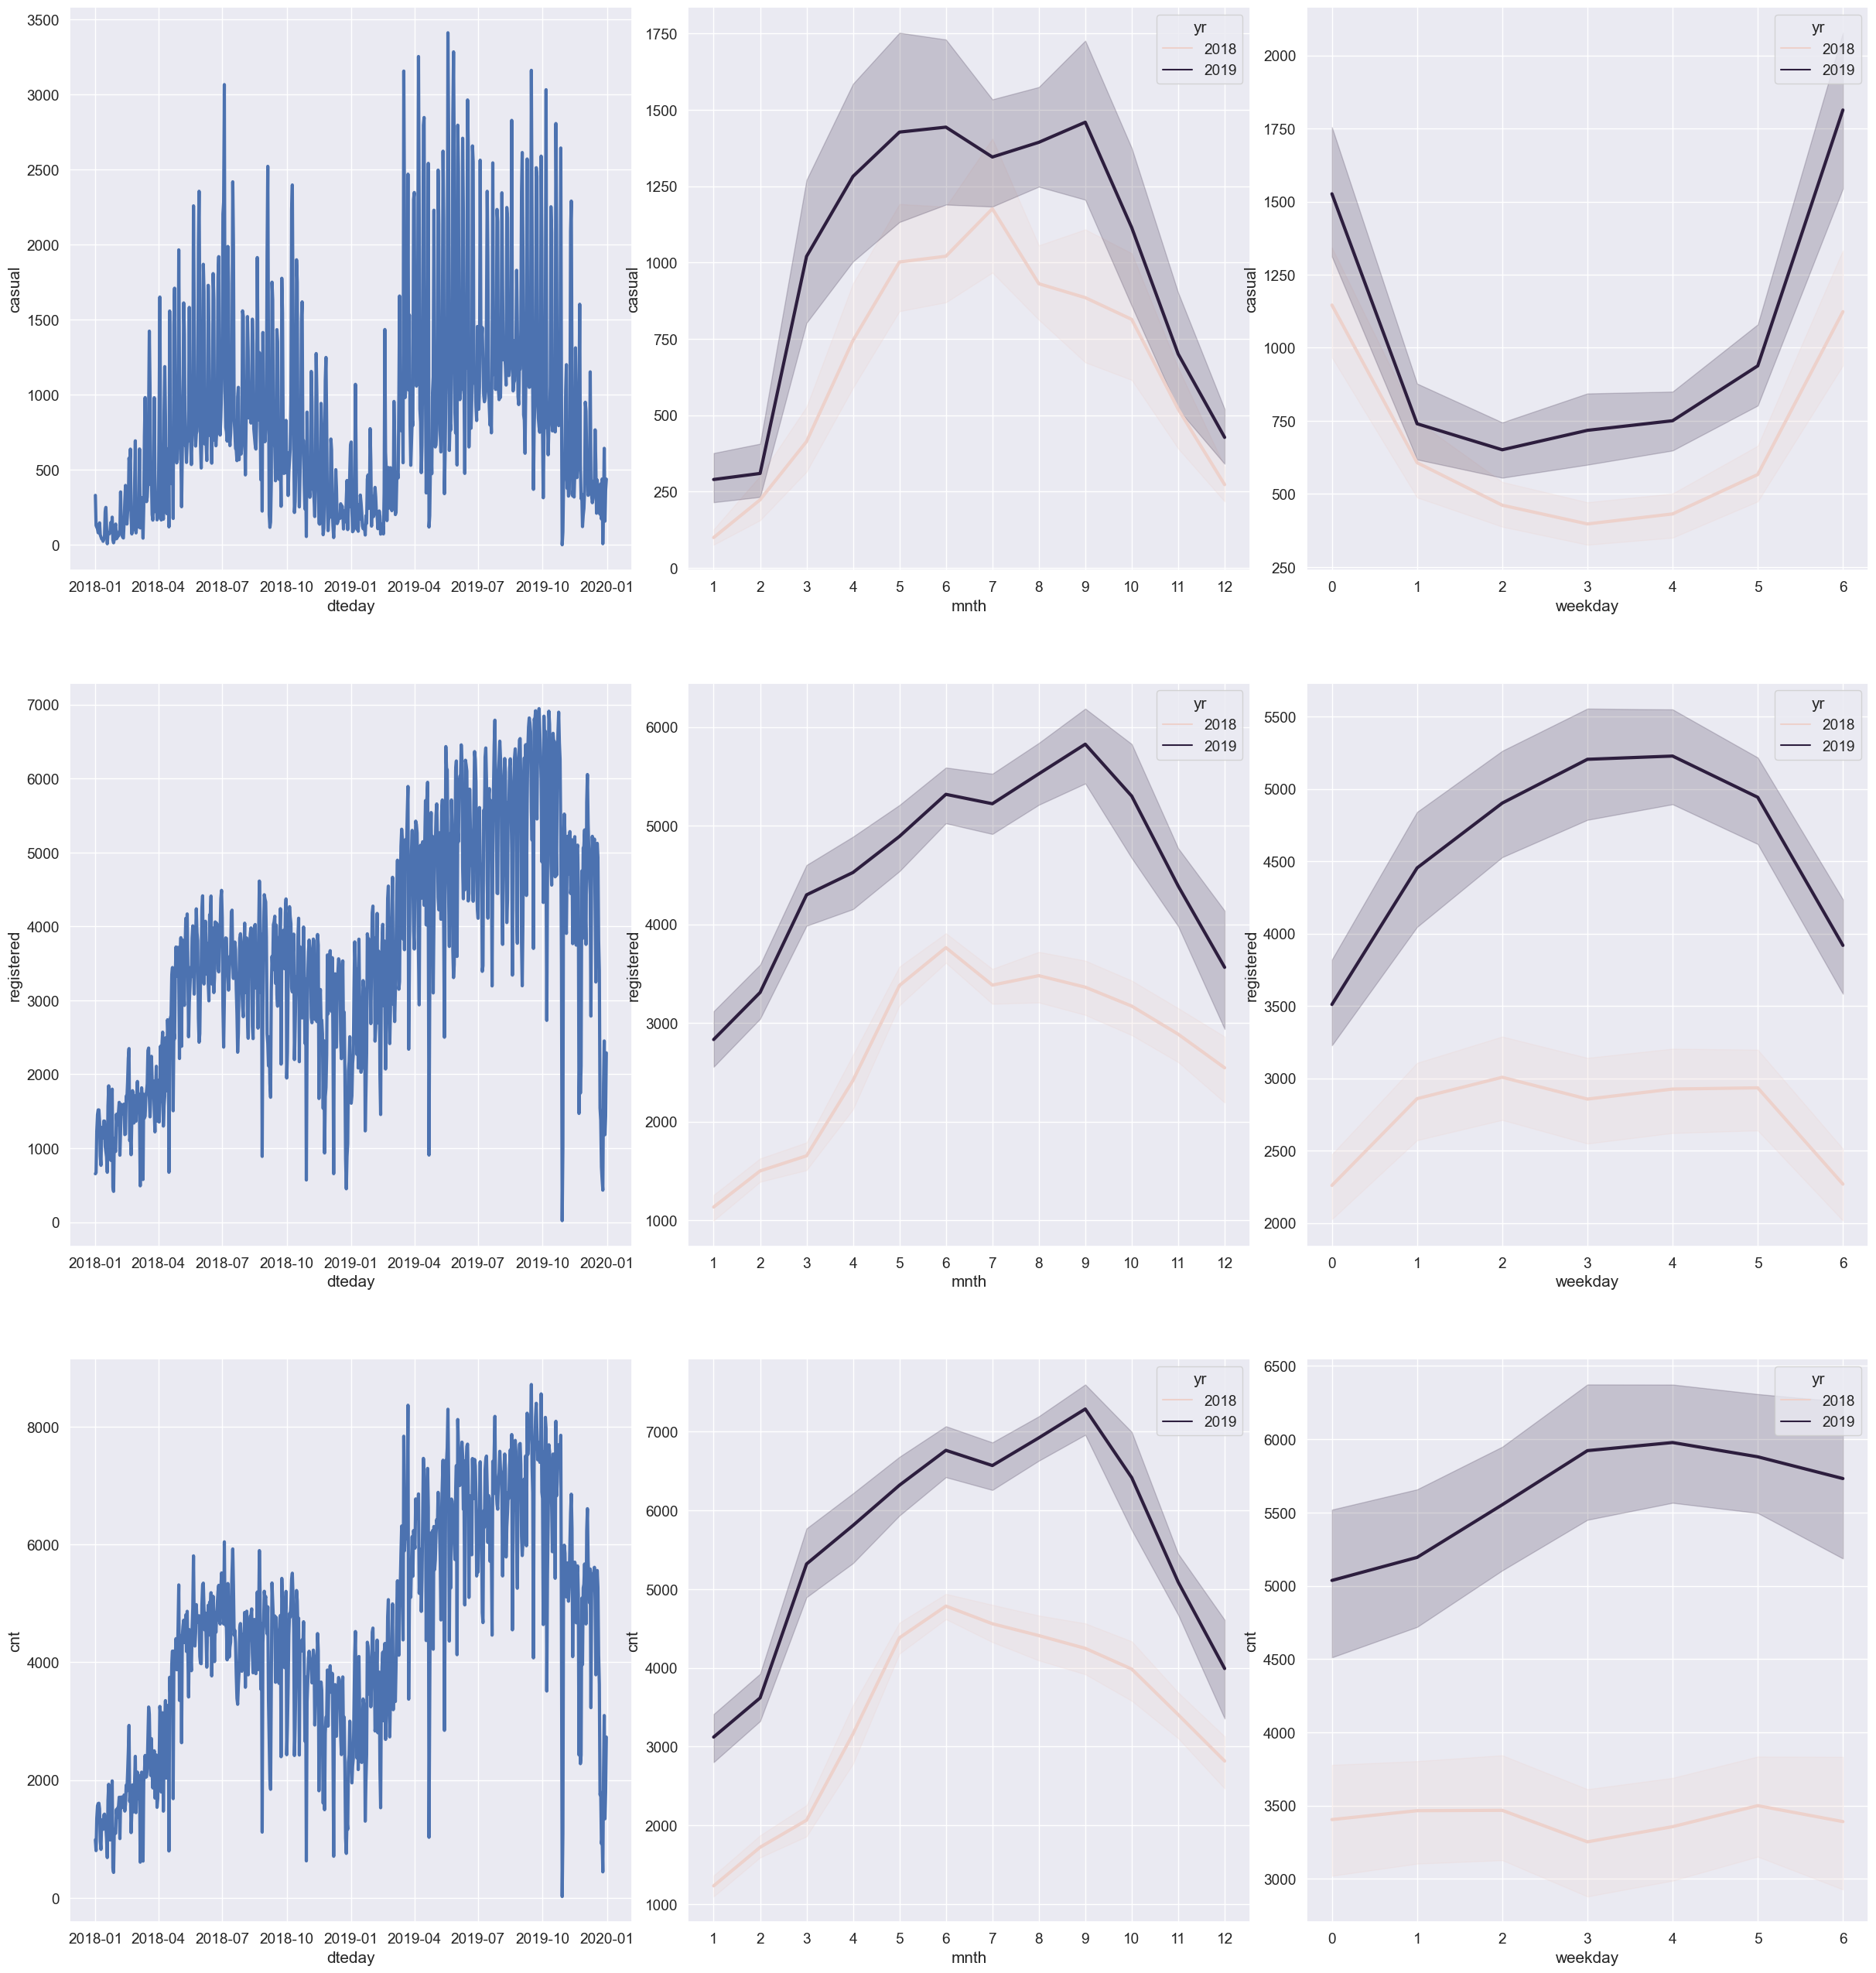

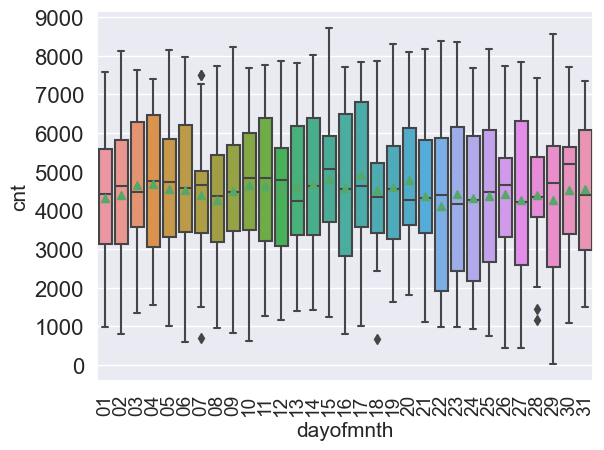

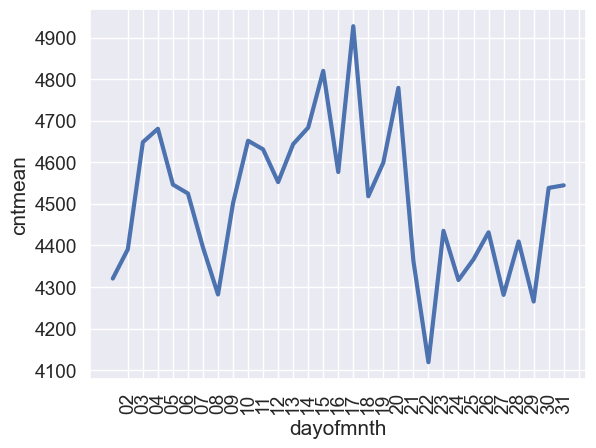

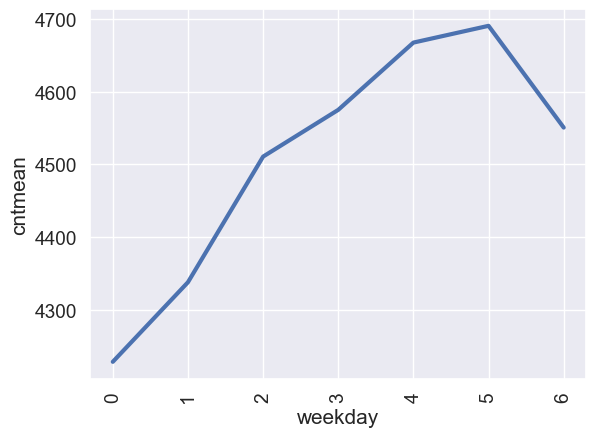

In [7]:
features = ['casual', 'registered', 'cnt']
sns.set(font_scale = 1.25)
fig, axs = plt.subplots(3,3, figsize = (30,25))
plt.subplots_adjust(top = 1, bottom = 0.01, hspace = 0.2, wspace = 0.1)

for i, feature in enumerate(features):
    ax = sns.lineplot(ax = axs[i, 0], data = bike_sharing , x = 'dteday', y = feature, linewidth = 3)
    bx = sns.lineplot(ax = axs[i, 1], data= bike_sharing, x = 'mnth', y = feature, hue = 'yr', linewidth = 3)
    bx.set_xticks(bike_sharing.mnth.unique())
    cx = sns.lineplot(ax = axs[i, 2], data= bike_sharing, x = 'weekday', y = feature, hue = 'yr', linewidth = 3)
plt.show()

# Curious to check if a particular day of month has any significance, if in case people are employed they may get
# salary on a perticular day/biweekly/semi-monthly/monthly and they may be ready to spend on that day or next day 
# or that week.

bike_sharing['dayofmnth'] = bike_sharing['dteday'].apply(lambda x : x.strftime('%d'))
yticks = [ i for i in range(0,10000,1000)]
sns.boxplot(data = bike_sharing, x = bike_sharing['dayofmnth'] , y = 'cnt', showmeans = True)
plt.xticks(rotation = 90)
plt.yticks(yticks, fontsize="16" )
plt.show()

df = pd.DataFrame()
df[['dayofmnth','cntmean']] = bike_sharing[['dayofmnth','cnt']].groupby(by = 'dayofmnth')['cnt'].mean().reset_index()
ax = sns.lineplot(data = df, x = 'dayofmnth', y = 'cntmean', linewidth = 3)
ax.set_xticks([ i for i in range(1, 32, 1)])
plt.xticks(rotation = 90)
plt.show()

df = pd.DataFrame()
df[['weekday','cntmean']] = bike_sharing[['weekday','cnt']].groupby(by = 'weekday')['cnt'].mean().reset_index()
ax = sns.lineplot(data = df, x = 'weekday', y = 'cntmean', linewidth = 3)
ax.set_xticks([ i for i in range(0, 7, 1)])
plt.xticks(rotation = 90)
plt.show()


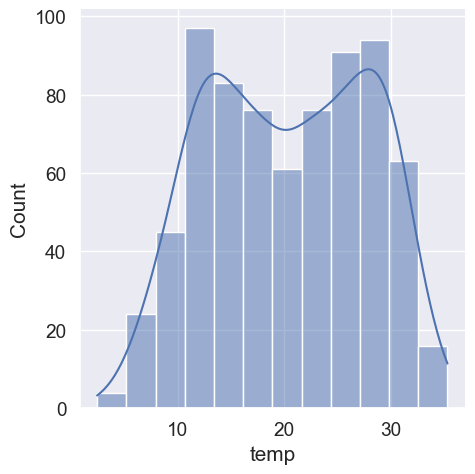

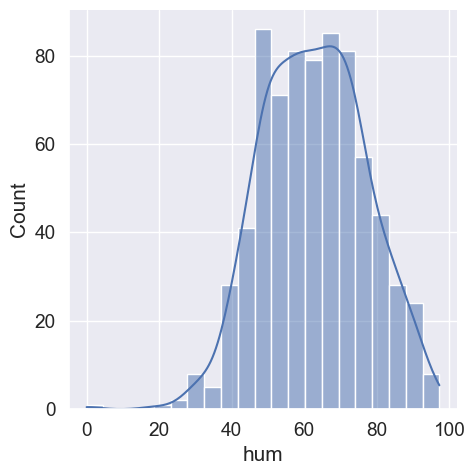

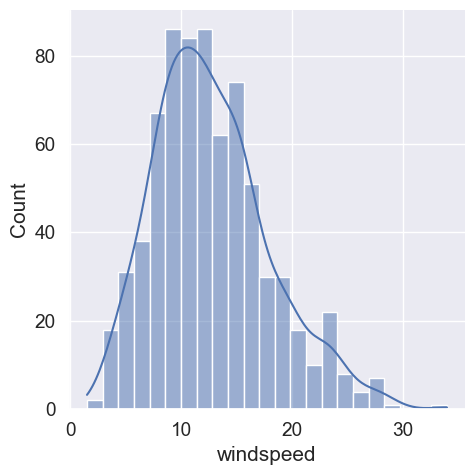

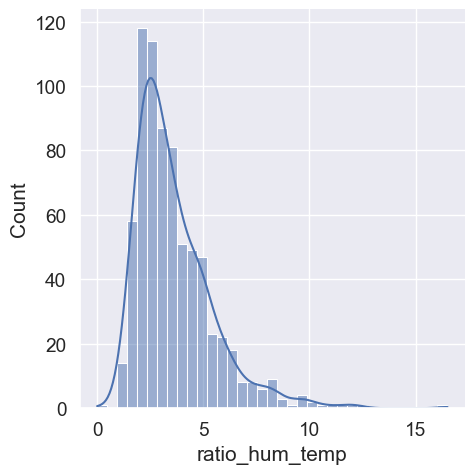

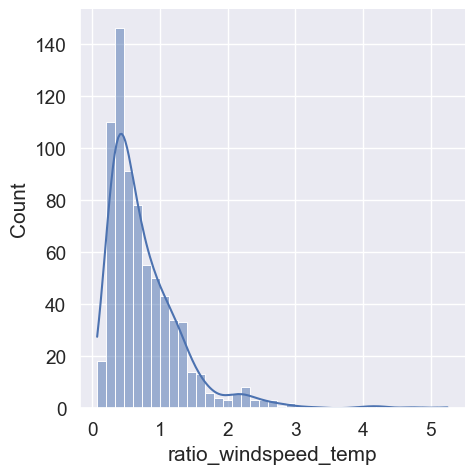

In [8]:
# # Visualize data using sweetviz
# report = sv.analyze(bike_sharing)
# report.show_html('bike_sharing_visual_report.html')
features_for_dist_plotting = ['temp','hum','windspeed','ratio_hum_temp','ratio_windspeed_temp']

for feature in features_for_dist_plotting:
    ax = sns.displot(bike_sharing[feature], ax = axs[i], kde = True)
    plt.show()

###  <font color = 'green' size = 3> From the data visualization plots above, we can see </font>
1. People have used shared bikes more in season 3 (fall) followed by summer and winter. Spring season has least usage of shared bikes. So, demand is high in Fall and low in Spring season
2. People have used more shared bikes in 2019 than in 2018. Looks like the demand is increasing every year overall.
3. In both 2018 and 2019, usage of shared bike increased from January to June. In 2018 it has hit peek in June and then slowing down till december. In 2019 after June, decreased a bit in July and then increased in August and September, hitting a peek in September and then falling down until december. March, April, September and October months have more spread and fluctuation in the usage. Overall, tendency to use shared bikes increase from January to June and starts to decrease a bit until September then decreases more with more fluctuations in September and October.
4. ` Overall, Public holidays data is showing a dip, which means people are not using much during holidays compared to non holiday. However, on some holidays people are using more shared bike than the day before and after holiday, which we can see in the data in spreadsheet for ` <font size=3, fontweight='bold'>Independence day, Christmas Day, Columbus Day.</font>
5. In the data of feature weekday each unique number represent a day of week and below is the mapping for the same,<br>
    0 - Tuesday <br>
    1 - Wednesday <br>
    2 - Thursday <br>
    3 - Friday <br>
    4 - Saturday <br>
    5 - Sunday <br>
    6 - Monday <br>
    From lineplot, we can see in 2018 usage of shared bikes is increasing in weekday from Tuesday to Thursday and drops a bit on Friday and increase on Saturday and Sunday follwed by a drop on Monday. In 2019, usage of shared bikes is increasing in weekday from Tuesday to Saturday and descreased on Sunday and Monday.
6. From workday against count of bike shares, we can say that the demand is pretty much the same with working and non working day. But, the spread is more for working day. Overall, shared bikes usage shows that it increases from Tuesday to Sunday and drops on Monday.
7. `There are no data for weather situation 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog. Thus, We wouldn't be able to use it for prediction or make predictions based on it.` <br>
    Furthermore, demand is more Weather Situation 1: Clear, Few clouds, Partly cloudy, Partly cloudy followed by 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, followed by 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
8. From the Scatter plot of cnt, casual and registered against date, we can see that the demand is increasing  every year.
9. From the boxplot of casual, registered and cnt, we can see casual bike sharing is having some outlier. Let's not treat those as casual and registered features will not help with our model as the total of those two is the cnt and our goal is to find the overall demand trend and factors affecting it.
10. Humidity and Windspeed are having bit of negative impact on count of bike shares. We will check the P-Value and VIF later. 
11. Temperature and Feels like temperature are having impacts on the bike share, looks like people tend to use shared bikes more in medium high temperature than in cold temperatures. Feels like Temperature has more impact than  actual Temperature. From Intuition also it's true that people avoid shared bikes in cold climatic temperature. We will use temp feature for analysis and drop atemp as they both represent the same in 99% of the time, which can be seen from heatmap.
12. People are more leaning towards registering than being casual users. Also, casual users distribution in pairplot show that it is right skewed.
13. From the derived metric dayofmonth, we can see that the average usage is more in mid of the month And, in the end and begining of month. Could be salaried employees contributing more there.
14.### Overall, we can see that the variance is explained by the independed variables and it makes sense to build a machine learning Linear Regression Model for the given data set.

### Through a good amount of data visualization, we are able get good insights of the data and know couple of features to remove upfront before starting to build the model. We will proceed to next step
### 2. Preprocessing and preparing the Data for modeling
1. Remove features which are not important for the model
    * Total bike sharing count represented by cnt feature, which is sum of Casual and Registered bike sharing counts. So, for building the model, we will remove 'casual' and 'registered' features as we are interested in learning the factors affecting the total count and build a model not why/how the share between Casual and Registered looks.
    * Remove sew metric 'dayofmnth', which is added just to check how the data looks for each day in month
    * Remove dteday as it will not help in building the model as our goal is to identify key factors which can impact the demand. We know from the plots that the demand is increasing every year and we have year column to represent it. Furthermore, we are not going to build time series model and removing it will not hurt.
    * Remove atemp as it highly correlated with the temp with correlation coefficient of 0.99
2. Encoding
    * For better readability, we will map the numbers in categories with respective string names
    * Create dummy variables for categorical feature, if required
2. Splitting data into train and test set
3. Feature scaling for ease of interpretation and optimization 

In [9]:

# Remove features ''casual', 'registered', 'dayofmnth', 'dteday', 'atemp' for reasons mentioned above

bike_sharing.drop(columns = ['casual', 'registered', 'dayofmnth', 'dteday', 'atemp'], inplace = True)

# Encoding

# For better readability, we will map the the numbers in the categories with category names
# Convert numbers in season with actual season name provided in the data dictionary
conversion_dict = { 1 : 'spring',
                    2 : 'summer', 
                    3 : 'fall',
                    4 : 'winter' }
bike_sharing['season'] = bike_sharing['season'].replace(conversion_dict)

# From the data and looking into the calendar, we were able to do the mapping of numbers to actual name of weekday
# and we will do the conversion as below
conversion_dict = { 0 : 'tuesday',
                    1 : 'wednesday',
                    2 : 'thursday',
                    3 : 'friday',
                    4 : 'saturday',
                    5 : 'sunday',
                    6 : 'monday' }
bike_sharing['weekday'] = bike_sharing['weekday'].replace(conversion_dict)

# From the data and looking into the calendar, we were able to do the mapping of numbers to actual name of month
# and we will do the conversion as below
conversion_dict = { 1 : 'january',
                    2 : 'february',
                    3 : 'march',
                    4 : 'april',
                    5 : 'may',
                    6 : 'june',
                    7 : 'july',
                    8 : 'august',
                    9 : 'september',
                   10 : 'october',
                   11 : 'november',
                   12 : 'december' }
bike_sharing['mnth'] = bike_sharing['mnth'].replace(conversion_dict)


# For weather sitiaution we will prefix the column name for now, we will use the actual weather situation
# for interpretation once model is ready 
bike_sharing['weathersit'] = 'weathersit_' + bike_sharing['weathersit'].astype('str')

# Create dummy features to represent the categories of categorical features 
# 'season', 'mnth', 'weekday','weathersit'
 
for feature in ['season','mnth','weekday','weathersit']:
    tmp_df = pd.get_dummies(bike_sharing[feature], drop_first = True)
    bike_sharing = pd.concat([bike_sharing, tmp_df], axis = 1)
    bike_sharing.drop([feature], axis = 1, inplace = True)

bike_sharing.head()


yr  holiday  workingday       temp      hum  windspeed   cnt  \
0  2018        0           0  14.110847  80.5833  10.749882   985   
1  2018        0           0  14.902598  69.6087  16.652113   801   
2  2018        0           1   8.050924  43.7273  16.636703  1349   
3  2018        0           1   8.200000  59.0435  10.739832  1562   
4  2018        0           1   9.305237  43.6957  12.522300  1600   

   ratio_hum_temp  ratio_windspeed_temp  spring  summer  winter  august  \
0        5.710734              0.761817       1       0       0       0   
1        4.670910              1.117397       1       0       0       0   
2        5.431339              2.066434       1       0       0       0   
3        7.200427              1.309736       1       0       0       0   
4        4.695818              1.345726       1       0       0       0   

   december  february  january  july  june  march  may  november  october  \
0         0         0        1     0     0      0    0         0        0   
1         0         0        1     0     0      0    0         0        0   
2         0         0        1     0     0      0    0         0        0   
3         0         0        1     0     0      0    0         0        0   
4         0         0        1     0     0      0    0         0        0   

   september  monday  saturday  sunday  thursday  tuesday  wednesday  \
0          0       1         0       0         0        0          0   
1          0       0         0       0         0        1          0   
2          0       0         0       0         0        0          1   
3          0       0         0       0         1        0          0   
4          0       0         0       0         0        0          0   

   weathersit_2  weathersit_3  
0             1             0  
1             1             0  
2             0             0  
3             0             0  
4             0             0

In [10]:
# Make sure all the data is numeric
print(bike_sharing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   hum                   730 non-null    float64
 5   windspeed             730 non-null    float64
 6   cnt                   730 non-null    int64  
 7   ratio_hum_temp        730 non-null    float64
 8   ratio_windspeed_temp  730 non-null    float64
 9   spring                730 non-null    uint8  
 10  summer                730 non-null    uint8  
 11  winter                730 non-null    uint8  
 12  august                730 non-null    uint8  
 13  december              730 non-null    uint8  
 14  february              730 non-null    uint8  
 15  january               7

In [11]:

# Splitting data into train and test
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)


(510, 31)
(220, 31)


## <u>NOTE:</u>
### DO NOT MODIFY df_train (Training data), df_test (Testing Data). JUST USE THEM, WHEN NEEDED

In [12]:

# Feature Scaling
# We will use MinMax scaling for rescaling the continuous fetures

# 1. Initialize the object 
scaler = MinMaxScaler()

# 2. Fit and transform train data
num_vars = ['yr', 'temp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# 3. Only transform test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Create a dictionary  to hold the selected feature with manual, automated, 
# automated (coarse tuning) + manual (fine tuning) approaches we will use to build the model
selected_features = dict()


In [13]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
576  1.0        0           1  0.815169  0.725633   0.264686  0.827658   
426  1.0        0           0  0.442393  0.640189   0.255342  0.465255   
728  1.0        0           0  0.245101  0.498067   0.663106  0.204096   
482  1.0        0           0  0.395666  0.504508   0.188475  0.482973   
111  0.0        0           1  0.345824  0.751824   0.380981  0.191095   

     ratio_hum_temp  ratio_windspeed_temp  spring  summer  winter  august  \
576        2.407684              0.378966       0       0       0       0   
426        3.658534              0.635557       1       0       0       0   
728        4.607932              2.240459       1       0       0       0   
482        3.170187              0.563888       0       1       0       0   
111        5.285551              1.065532       0       1       0       0   

     december  february  january  july  june  march  may  november  october  \
576         0         0        0     1     0      0    0         0        0   
426         0         0        0     0     0      1    0         0        0   
728         1         0        0     0     0      0    0         0        0   
482         0         0        0     0     0      0    0         0        0   
111         0         0        0     0     0      0    0         0        0   

     september  monday  saturday  sunday  thursday  tuesday  wednesday  \
576          0       0         0       0         1        0          0   
426          0       1         0       0         0        0          0   
728          0       0         0       0         0        1          0   
482          0       1         0       0         0        0          0   
111          0       0         0       1         0        0          0   

     weathersit_2  weathersit_3  
576             0             0  
426             1             0  
728             0             0  
482             1             0  
111             1             0

In [14]:
df_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
184  0.0        1           0  0.831783  0.657364   0.084219  0.692706   
535  1.0        0           1  0.901354  0.610133   0.153728  0.712034   
299  0.0        0           1  0.511964  0.837699   0.334206  0.303382   
221  0.0        0           1  0.881625  0.437098   0.339570  0.547400   
152  0.0        0           1  0.817246  0.314298   0.537414  0.569029   

     ratio_hum_temp  ratio_windspeed_temp  spring  summer  winter  august  \
184        2.141139              0.183232       0       0       0       0   
535        1.845501              0.237681       0       1       0       0   
299        4.218563              0.687604       0       0       1       0   
221        1.349417              0.426849       0       0       0       1   
152        1.040423              0.668028       0       1       0       0   

     december  february  january  july  june  march  may  november  october  \
184         0         0        0     1     0      0    0         0        0   
535         0         0        0     0     1      0    0         0        0   
299         0         0        0     0     0      0    0         0        1   
221         0         0        0     0     0      0    0         0        0   
152         0         0        0     0     1      0    0         0        0   

     september  monday  saturday  sunday  thursday  tuesday  wednesday  \
184          0       0         0       0         0        0          1   
535          0       0         0       0         0        0          0   
299          0       0         1       0         0        0          0   
221          0       0         0       0         0        0          0   
152          0       0         1       0         0        0          0   

     weathersit_2  weathersit_3  
184             1             0  
535             0             0  
299             1             0  
221             0             0  
152             0             0

### Step 3: Training the model
1. Manual approach - Through checking P-value and VIF and builing the model iteratively
2. Automated approach - Through Recursive Feature Elimination(RFE)
3. Combination of automated (coarse tuning)  and manual (fine tuning) aproach <br>

#### 1. Manual appoach

In [15]:
# X_train, y_train
y_train = df_train['cnt']
X_train = df_train.drop(columns = ['cnt'])

print(y_train.shape)
print(X_train.shape)

print(y_train.head())
y_train.head()


(510,)
(510, 30)
576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64


576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### We will start the model with all the features and use P-value and VIF stats to drop the least important features one by one manually.
### We will use 0.05 significance level for P-value and VIF < 5 to keep the features for regression model and drop other features.

In [16]:

def calc_print_Pvalue_stats(*, y, X):
    
    # Check the P-values for significance of the features
    # Add a constant
    X = sm.add_constant(X)

    # Create a model
    lr = sm.OLS(y, X)

    # fit model
    lr_model = lr.fit()
    print(lr_model.summary(), '\n\n\n\n')


def calc_print_VIFvalue_stats(*, X):

    
    # Check VIF for Multicollinearity
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    print(vif_data.sort_values(by='VIF',ascending=False))

# Find P-value and VIF of each feature
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     96.17
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.15e-179
Time:                        04:23:28   Log-Likelihood:                 528.10
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     480   BIC:                            -869.2
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2699 

#### <font color='green'> March month has high P-value of 0.969 and low VIF 3.488015. High P-value says that it is not significant and thus we will remove it

In [17]:

X_train.drop(columns = ['march'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.81
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.14e-180
Time:                        04:23:28   Log-Likelihood:                 528.09
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     481   BIC:                            -875.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2704 

#### <font color='green'> october  month has high P-value of 0.793 and low VIF 4.771784. High P-value says that it is not significant and thus we will remove it </font>

In [18]:

X_train.drop(columns = ['october'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.14e-181
Time:                        04:23:29   Log-Likelihood:                 528.06
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2721 

#### <font color='green'> saturday  has high P-value of 0.755 and low VIF 1.620953. High P-value says that it is not significant and thus we will remove it </font>

In [19]:

X_train.drop(columns = ['saturday'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.14e-182
Time:                        04:23:29   Log-Likelihood:                 528.01
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2707 

#### <font color='green'> ratio_hum_temp has high P-value of 0.664 and low VIF 11.877726. High P-value says that it is not significant and thus we will remove it </font>

In [20]:

X_train.drop(columns = ['ratio_hum_temp'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.17e-183
Time:                        04:23:29   Log-Likelihood:                 527.91
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2648 

#### <font color='green'> june has high P-value of 0.665 and low VIF 2.491566. High P-value says that it is not significant and thus we will remove it </font>

In [21]:

X_train.drop(columns = ['june'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.17e-184
Time:                        04:23:29   Log-Likelihood:                 527.81
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2637 


#### <font color='green'> holiday has high P-value of 0.617 and low VIF 4.675682. High P-value says that it is not significant and thus we will remove it </font>


In [22]:

X_train.drop(columns = ['holiday'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.17e-184
Time:                        04:23:29   Log-Likelihood:                 527.81
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2755 


#### <font color='green'> sunday month has high P-value of 0.596 and low VIF 1.455151. High P-value says that it is not significant and thus we will remove it </font>


In [23]:

X_train.drop(columns = ['sunday'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.20e-185
Time:                        04:23:29   Log-Likelihood:                 527.66
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     486   BIC:                            -905.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2785 


#### <font color='green'> august has high P-value of 0.471 and low VIF 3.356669. High P-value says that it is not significant and thus we will remove it </font>


In [24]:

X_train.drop(columns = ['august'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.36e-186
Time:                        04:23:29   Log-Likelihood:                 527.39
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -911.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2868 


#### <font color='green'> thursday has high P-value of 0.297 and low VIF 1.329899. High P-value says that it is not significant and thus we will remove it </font>


In [25]:

X_train.drop(columns = ['thursday'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.99e-187
Time:                        04:23:29   Log-Likelihood:                 526.82
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     488   BIC:                            -916.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2853 


#### <font color='green'> wednesday has high P-value of 0.259 and low VIF 1.339871. High P-value says that it is not significant and thus we will remove it </font>


In [26]:

X_train.drop(columns = ['wednesday'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.12e-188
Time:                        04:23:29   Log-Likelihood:                 526.15
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2742 


#### <font color='green'> ratio_windspeed_temp has high P-value of 0.229 and low VIF 11.604537. High P-value says that it is not significant and thus we will remove it </font>


In [27]:

X_train.drop(columns = ['ratio_windspeed_temp'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.20e-189
Time:                        04:23:29   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2478      0.045      5.472   


#### <font color='green'> may has high P-value of 0.186 and low VIF 1.594697. High P-value says that it is not significant and thus we will remove it </font>



In [28]:

X_train.drop(columns = ['may'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.80e-190
Time:                        04:23:29   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2368      0.045      5.315   


#### <font color='green'> february has high P-value of 0.119 and low VIF 1.924168. High P-value says that it is not significant and thus we will remove it </font>


In [29]:

X_train.drop(columns = ['february'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.52e-190
Time:                        04:23:29   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2235      0.044      5.103   



#### <font color='green'> tuesday has high P-value of 0.054 and low VIF 4.827320. High P-value says that it is not significant and thus we will remove it </font>

In [30]:

X_train.drop(columns = ['tuesday'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.20e-190
Time:                        04:23:29   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2690      0.037      7.267   



#### <font color='green'> Humidity has high VIF 31.083763 and low P-value of 0.00. High P-value says that it has multicollinearity with other features. We saw that it is correlated with temperature with correlation coefficient of 0.13</font>


In [31]:

X_train.drop(columns = ['hum'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.84e-188
Time:                        04:23:29   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1985      0.033      6.031   


#### <font color='green'> temp has high VIF 6.918120 and low P-value of 0.00. R-square value is 0.844 and Adjusted R-square is 0.840, which is pretty good with a P-value of 0. But, we will  fine tune by removing the temp as 85.54% variance in temp is explained by other features remaining in the train set as per it's VIF.</font>


In [32]:

X_train.drop(columns = ['temp'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.73e-161
Time:                        04:23:29   Log-Likelihood:                 446.27
No. Observations:                 510   AIC:                            -862.5
Df Residuals:                     495   BIC:                            -799.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5452      0.019     28.928   


#### <font color='green'> july has high P-value of  0.469  and low VIF 1.291771. High P-value says that it is not significant and thus we will remove it </font>

In [33]:

X_train.drop(columns = ['july'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.80e-162
Time:                        04:23:29   Log-Likelihood:                 446.00
No. Observations:                 510   AIC:                            -864.0
Df Residuals:                     496   BIC:                            -804.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5395      0.017     31.606   

#### <font color='green'> winter has high P-value of  0.390  and low VIF 2.842678. High P-value says that it is not significant and thus we will remove it </font>


In [34]:

X_train.drop(columns = ['winter'], inplace = True)
calc_print_Pvalue_stats(y = y_train, X = X_train)
calc_print_VIFvalue_stats(X = X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.00e-163
Time:                        04:23:29   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5348      0.016     33.009   

### <font color='green'> We will stop the feature elimination as we have a pretty good list of features with evaluation metrics values as below,
    1. All P-value < 0.05
    2. All VIF < 5
    3. R-Square : 0.797
    4. Adjusted R-Square :  0.792
    5. F-statistic(Explained/Unexplained variance) : 162.7
    6. Low AIC of -865.2
    7. Low BIC of -810.2
   

In [35]:
# Save the features selected in dictionary
selected_features['manual'] = X_train.columns

### Step 4: Residual Analysis

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.00e-163
Time:                        04:23:29   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5348      0.016     33.009   

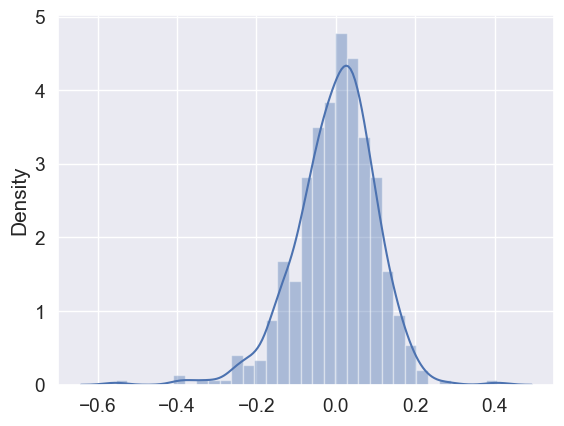

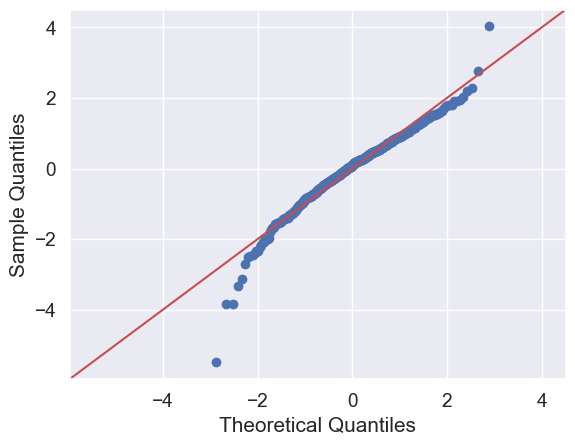

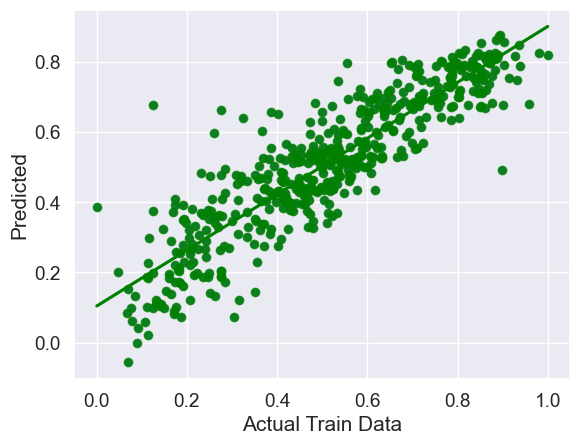

In [36]:
# Set X_train and y_train
X_train = df_train[selected_features['manual']]
y_train = df_train['cnt']

# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create a model
lr = sm.OLS(y_train, X_train_sm)

# Fit model
lr_model = lr.fit()
print(lr_model.summary(), '\n\n\n\n')

# Predict
y_train_pred_predicted = lr_model.predict(X_train_sm)
residual = lr_model.resid

# Plot the Distribution of residual 
sns.distplot(residual)
plt.show()


# Q-Q plot to understand the distribution of residuals
sm.qqplot(residual, line ='45', fit = True, dist = stats.norm)
plt.show()

# Plot the scatter plot of train data against prediction and show the regression line
sns.scatterplot(x = y_train, y = y_train_pred_predicted)
sns.regplot(x = y_train, y = y_train_pred_predicted ,ci=None, color ='green')
plt.xlabel('Actual Train Data')
plt.ylabel('Predicted')
plt.show()




### <font color='green'> We can see that the residual(errors terms) are normally distributed with a mean 0 for the model

### Step 5: Prediction and evaluation on the test set

In [37]:
# In the process of building the model we removed all the insignificant and multicollinear feature who have 
# either a P-value > 0.05 or VIF > 5 
# Now, while testing we should be using only the remaining features in X_train
X_test = df_test[selected_features['manual']]
y_test = df_test['cnt']

X_test.head()

yr  workingday  windspeed  spring  summer  december  january  november  \
184  0.0           0   0.084219       0       0         0        0         0   
535  1.0           1   0.153728       0       1         0        0         0   
299  0.0           1   0.334206       0       0         0        0         0   
221  0.0           1   0.339570       0       0         0        0         0   
152  0.0           1   0.537414       0       1         0        0         0   

     september  monday  weathersit_2  weathersit_3  
184          0       0             1             0  
535          0       0             0             0  
299          0       0             1             0  
221          0       0             0             0  
152          0       0             0             0

The accuracy of the model with 70% training and 30% test set is :  78.52 %


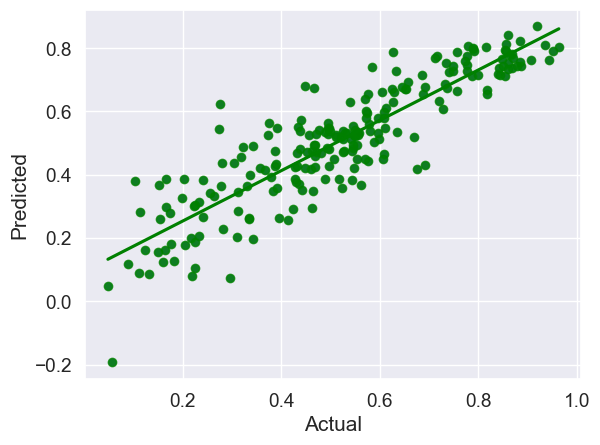

In [38]:

# Set X_test and y_test
X_test = df_test[selected_features['manual']]
y_test = df_test['cnt']

# Add a constant
X_test_sm = sm.add_constant(X_test)

# Predict
y_test_pred = lr_model.predict(X_test_sm)

# Evaluate accuracy
r2_score_of_model = r2_score(y_true = y_test, y_pred = y_test_pred) 
percentage_of_r2_score_of_model = round(r2_score_of_model * 100, 2)

print('The accuracy of the model with 70% training and 30% test set is : ', percentage_of_r2_score_of_model, '%')

# Plot the scatter plot of test data against prediction and show the regression line
sns.scatterplot(x = y_test, y = y_test_pred)
sns.regplot(x = y_test, y = y_test_pred ,ci=None, color ='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()



### <font color='green'> Equation of our best fitted linear regression model with 12 feature is,</font>

 
### <font color='blue'>$ SharedBikeCount \, = \, 0.5348 + \,0.2461 * yr\, + \,0.0571 * workingday\, - \,0.1926 *  windspeed\, - \, 0.2376 * spring\, - \,0.0385 * summer\,  -  \,0.1232 * january\, +\,0.0563 * september\, - \,0.1122 * november\, - \,0.1183 * december\, + \,0.0664 * monday\, -\,0.0890 * weathersit_2\, - \, 0.3202 * weathersit_3$ </font>

### <u>NOTE:</u> 
* weathersit_2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
* weathersit_3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

### <font color='green'>The accuracy of the model with 70% training and 30% test set is :  78.52% </font>


### 2. Automated approach using Recursive Feature Elimination(RFE)

In [39]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
576  1.0        0           1  0.815169  0.725633   0.264686  0.827658   
426  1.0        0           0  0.442393  0.640189   0.255342  0.465255   
728  1.0        0           0  0.245101  0.498067   0.663106  0.204096   
482  1.0        0           0  0.395666  0.504508   0.188475  0.482973   
111  0.0        0           1  0.345824  0.751824   0.380981  0.191095   

     ratio_hum_temp  ratio_windspeed_temp  spring  summer  winter  august  \
576        2.407684              0.378966       0       0       0       0   
426        3.658534              0.635557       1       0       0       0   
728        4.607932              2.240459       1       0       0       0   
482        3.170187              0.563888       0       1       0       0   
111        5.285551              1.065532       0       1       0       0   

     december  february  january  july  june  march  may  november  october  \
576         0         0        0     1     0      0    0         0        0   
426         0         0        0     0     0      1    0         0        0   
728         1         0        0     0     0      0    0         0        0   
482         0         0        0     0     0      0    0         0        0   
111         0         0        0     0     0      0    0         0        0   

     september  monday  saturday  sunday  thursday  tuesday  wednesday  \
576          0       0         0       0         1        0          0   
426          0       1         0       0         0        0          0   
728          0       0         0       0         0        1          0   
482          0       1         0       0         0        0          0   
111          0       0         0       1         0        0          0   

     weathersit_2  weathersit_3  
576             0             0  
426             1             0  
728             0             0  
482             1             0  
111             1             0

  ### 2.1. Select the features 

In [40]:
def get_features_from_RFE(n_features_to_select):
    
    # Set the training data set
    X_train = df_train.drop(columns = ['cnt'])
    y_train = df_train['cnt']

    # Instantiate a LinearRegresssion model
    lm = LinearRegression()
    # Fit the data
    lm.fit(X = X_train, y = y_train)
    # With manual approach we were able to build a model with 14 features with 79% explainability 
    rfe = RFE(estimator = lm, n_features_to_select = n_features_to_select , step = 1)
    rfe = rfe.fit(X = X_train, y = y_train)
    
    automated_RFE_selected_features = sorted([(feature) for (feature, selected, rank)
                                                       in list(zip(X_train.columns,rfe.support_, rfe.ranking_))
                                                       if selected == True ], reverse = False)
    return automated_RFE_selected_features


In [41]:
automated_RFE_selected_features = get_features_from_RFE(18)
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[automated_RFE_selected_features])
calc_print_VIFvalue_stats(X = df_train[automated_RFE_selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.80e-190
Time:                        04:23:30   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2868      0.038      7.605   

In [42]:
# february has p value 0.119, we will reduce features to select 16 and check

automated_RFE_selected_features = get_features_from_RFE(16)
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[automated_RFE_selected_features])
calc_print_VIFvalue_stats(X = df_train[automated_RFE_selected_features])



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.30e-190
Time:                        04:23:30   Log-Likelihood:                 520.61
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     493   BIC:                            -935.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2586      0.036      7.096   

In [43]:
# November has p value 0.172, we will reduce features to select 15 and check

automated_RFE_selected_features = get_features_from_RFE(15)
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[automated_RFE_selected_features])
calc_print_VIFvalue_stats(X = df_train[automated_RFE_selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          4.22e-191
Time:                        04:23:30   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2519      0.036      6.969   

In [44]:
# All P-values are looking good, but VIF on humidity and temp is high. Lets reduce the
# features to select 14 and check 

automated_RFE_selected_features = get_features_from_RFE(14)
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[automated_RFE_selected_features])
calc_print_VIFvalue_stats(X = df_train[automated_RFE_selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.11e-191
Time:                        04:23:30   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2402      0.036      6.714   

` We can clearly see RFE give precedence to P-value as it did not remove humidity with high VIF, instead, it removed January with p value 0.031. Also, after trying with couple of iterations by reducing the feature selection size, got to know that RFE looks for  coefficient [0.025      0.975]  and removes other features, though the P-value of features is less than 0.05 and VIF is greater than 5. Let's select 12 features from RFE and verify it against models built through manual, manual + automated approach`


In [45]:

automated_RFE_selected_features = get_features_from_RFE(12)
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[automated_RFE_selected_features])
calc_print_VIFvalue_stats(X = df_train[automated_RFE_selected_features])

selected_features['automated_RFE'] = automated_RFE_selected_features


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.95e-190
Time:                        04:23:30   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2848      0.034      8.258   

In [46]:
# check if reducing the features by 2 more will remove humidity and temperature with high VIF

automated_RFE_selected_features = get_features_from_RFE(10)
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[automated_RFE_selected_features])
calc_print_VIFvalue_stats(X = df_train[automated_RFE_selected_features])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.79e-186
Time:                        04:23:31   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2682      0.026     10.292   

#### <font color='green'>As we can see the RFE algorithm still removing the feature by considering the other metrics except VIF</font >
### 2.2 <b>Lets build and test the model using 12 features selected through RFE<b>

In [47]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
576  1.0        0           1  0.815169  0.725633   0.264686  0.827658   
426  1.0        0           0  0.442393  0.640189   0.255342  0.465255   
728  1.0        0           0  0.245101  0.498067   0.663106  0.204096   
482  1.0        0           0  0.395666  0.504508   0.188475  0.482973   
111  0.0        0           1  0.345824  0.751824   0.380981  0.191095   

     ratio_hum_temp  ratio_windspeed_temp  spring  summer  winter  august  \
576        2.407684              0.378966       0       0       0       0   
426        3.658534              0.635557       1       0       0       0   
728        4.607932              2.240459       1       0       0       0   
482        3.170187              0.563888       0       1       0       0   
111        5.285551              1.065532       0       1       0       0   

     december  february  january  july  june  march  may  november  october  \
576         0         0        0     1     0      0    0         0        0   
426         0         0        0     0     0      1    0         0        0   
728         1         0        0     0     0      0    0         0        0   
482         0         0        0     0     0      0    0         0        0   
111         0         0        0     0     0      0    0         0        0   

     september  monday  saturday  sunday  thursday  tuesday  wednesday  \
576          0       0         0       0         1        0          0   
426          0       1         0       0         0        0          0   
728          0       0         0       0         0        1          0   
482          0       1         0       0         0        0          0   
111          0       0         0       1         0        0          0   

     weathersit_2  weathersit_3  
576             0             0  
426             1             0  
728             0             0  
482             1             0  
111             1             0

In [48]:
selected_features['automated_RFE']

['holiday',
 'hum',
 'july',
 'september',
 'spring',
 'summer',
 'temp',
 'weathersit_2',
 'weathersit_3',
 'windspeed',
 'winter',
 'yr']

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.95e-190
Time:                        04:23:31   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2848      0.034      8.258   

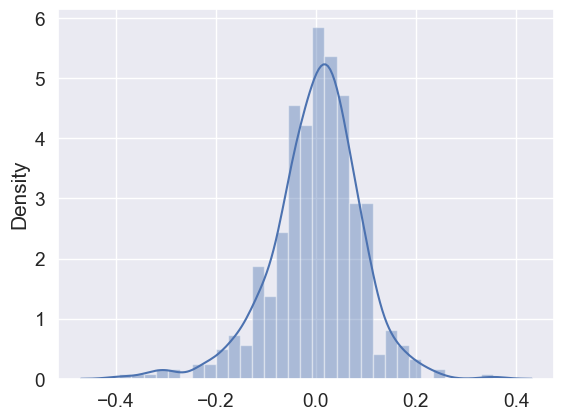

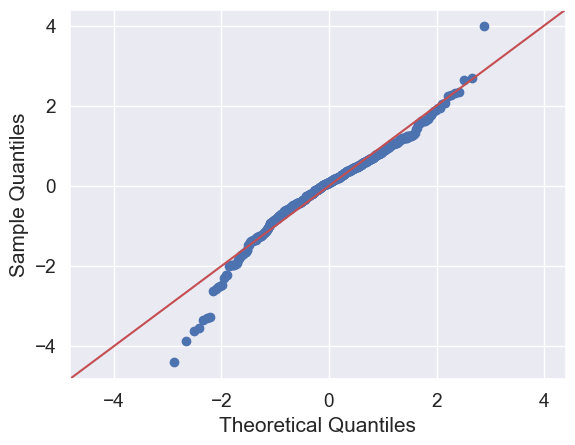

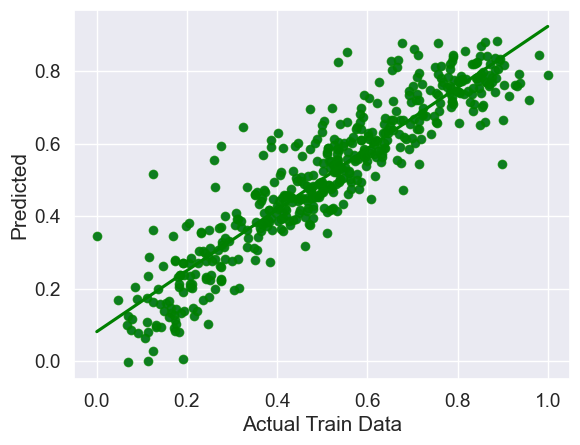

In [49]:
# Build the model using stats model for checking the statistics for 12 features selected by RFE algorithm

X_train = df_train[selected_features['automated_RFE']]
y_train = df_train['cnt']

# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create a model
lr = sm.OLS(y_train, X_train_sm)

# Fit model
lr_model = lr.fit()
print(lr_model.summary(), '\n\n\n\n')

# Predict
y_train_pred_predicted = lr_model.predict(X_train_sm)
residual = lr_model.resid

# Plot the Distribution of residual 
sns.distplot(residual)
plt.show()

# Q-Q plot to understand the distribution of residuals
sm.qqplot(residual, line ='45', fit = True, dist = stats.norm)
plt.show()

# Plot the scatter plot of train data against prediction and show the regression line
sns.scatterplot(x = y_train, y = y_train_pred_predicted)
sns.regplot(x = y_train, y = y_train_pred_predicted ,ci=None, color ='green')
plt.xlabel('Actual Train Data')
plt.ylabel('Predicted')
plt.show()



### <font color='green'> We can see that the residual(errors terms) are normally distributed with a mean 0 for the model
    1. All P-value < 0.05, All VIF < 5 except humidity and temperature.
    2. R-squared:  0.842
    3. Adj. R-squared:	0.838
    4. F-statistic: 220.6
    5. AIC: -992.6
    6. BIC: -937.5
    
### <font color='red'> Model is not good yet, with our goal to have P-value < 0.05 and VIF < 5 with all features. But, we will test it now and tweak it with manual intervention.</font>

### 2.3. Predict and Evaluate

The accuracy of the model with 70% training and 30% test set is :  81.52 %


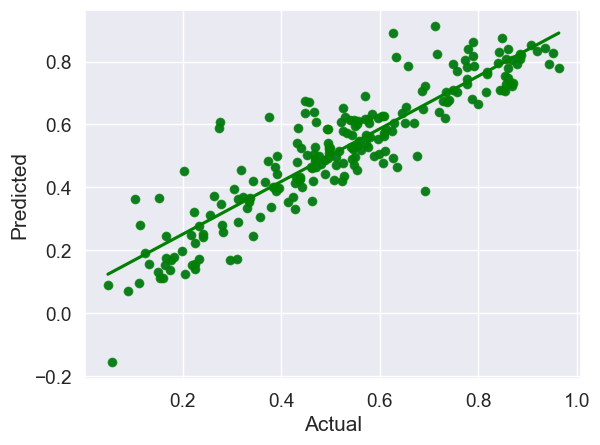

In [50]:

# Set X_test and y_test
X_test = df_test[selected_features['automated_RFE']]
y_test = df_test['cnt']

# Add a constant
X_test_sm = sm.add_constant(X_test)

# Predict
y_test_pred = lr_model.predict(X_test_sm)

# Evaluate accuracy
r2_score_of_model = r2_score(y_true = y_test, y_pred = y_test_pred) 
percentage_of_r2_score_of_model = round(r2_score_of_model * 100, 2)

print('The accuracy of the model with 70% training and 30% test set is : ', percentage_of_r2_score_of_model, '%')

# Plot the scatter plot of test data against prediction and show the regression line
sns.scatterplot(x = y_test, y = y_test_pred)
sns.regplot(x = y_test, y = y_test_pred ,ci=None, color ='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()



### <font color='red'> The accuracy of the model built using RFE with 12 features selection with 70% training and 30% test set is 81.52%. But, Temperature and Humidity have got high VIF and they are selected for training and prediction.

## Step 3: Manual and automated
### <font color='green'> We will stick with our plan to build model with 5% significance level (P-value of features < 0.05 ) and VIF <5  </font>

### 3.1 Build the model by selcting 14 features using RFE and then droping features with VIF > 5 and P-value >0.05

In [51]:

# Run RFE to get 14 features
automated_RFE_selected_features = get_features_from_RFE(14)
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[automated_RFE_selected_features])
calc_print_VIFvalue_stats(X = df_train[automated_RFE_selected_features])

# Set manual_and_automated_features, which will be used for removing features with high VIF and rebuild the model
manual_and_automated_features = automated_RFE_selected_features

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.11e-191
Time:                        04:23:31   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2402      0.036      6.714   

In [52]:
# Humidity has high VIF 28.459851 with 0 P-value, drop it and check the stats
manual_and_automated_features.remove('hum')
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[manual_and_automated_features])
calc_print_VIFvalue_stats(X = df_train[manual_and_automated_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.28e-188
Time:                        04:23:31   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1576      0.031      5.126   

In [53]:
# Temperature  has high VIF 6.965908 with 0 P-value, drop it and check the stats
manual_and_automated_features.remove('temp')
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[manual_and_automated_features])
calc_print_VIFvalue_stats(X = df_train[manual_and_automated_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.68e-149
Time:                        04:23:31   Log-Likelihood:                 412.53
No. Observations:                 510   AIC:                            -799.1
Df Residuals:                     497   BIC:                            -744.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5417      0.021     26.338   

In [54]:
# July has high P-value 0.646 and low  VIF 1.297608, drop it and check the stats
manual_and_automated_features.remove('july')
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[manual_and_automated_features])
calc_print_VIFvalue_stats(X = df_train[manual_and_automated_features])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.48e-150
Time:                        04:23:31   Log-Likelihood:                 412.43
No. Observations:                 510   AIC:                            -800.9
Df Residuals:                     498   BIC:                            -750.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5378      0.019     28.793   

In [55]:
# holiday has high P-value 0.074 and low  VIF 1.125050, drop it and check the stats
manual_and_automated_features.remove('holiday')
calc_print_Pvalue_stats(y = df_train['cnt'], X = df_train[manual_and_automated_features])
calc_print_VIFvalue_stats(X = df_train[manual_and_automated_features])



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.49e-151
Time:                        04:23:31   Log-Likelihood:                 410.80
No. Observations:                 510   AIC:                            -799.6
Df Residuals:                     499   BIC:                            -753.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5299      0.018     29.127   

### <font color='green'> We will stop the feature elimination as we have a pretty good list of features with evaluation metrics values as below,
1. All P-values < 0.05 and VIF < 5
2. R-squared: 0.767
3. Adj. R-squared: 0.763
4. F-statistic: 164.6
5. AIC: -799.6
6. BIC: -753.0

In [56]:
# Add selected feature for the model with automated and manual approach
selected_features['manual_automated_RFE'] = manual_and_automated_features

### 3.2 Residual analysis

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.49e-151
Time:                        04:23:31   Log-Likelihood:                 410.80
No. Observations:                 510   AIC:                            -799.6
Df Residuals:                     499   BIC:                            -753.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5299      0.018     29.127   

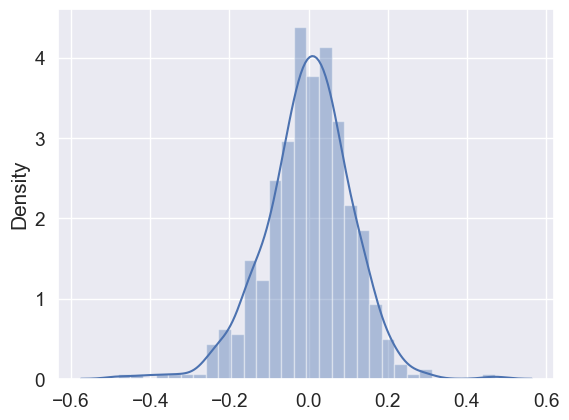

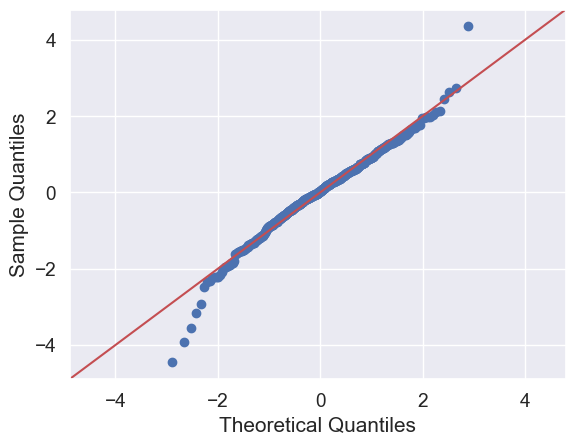

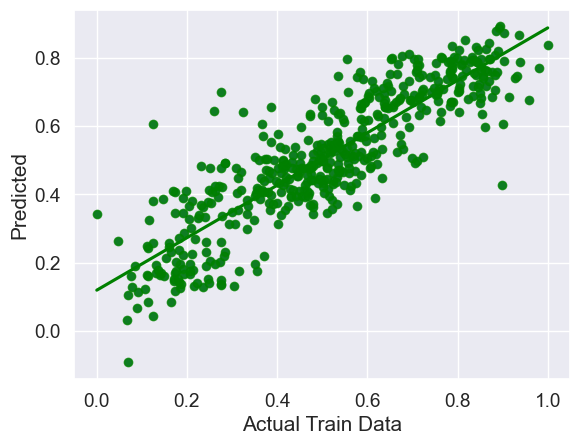

In [57]:

# Build model using stats model for checking the statistics with 10 features selected through 
# automated and manual approach
X_train = df_train[selected_features['manual_automated_RFE']]
y_train = df_train['cnt']

# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create a model
lr = sm.OLS(y_train, X_train_sm)

# Fit model
lr_model = lr.fit()
print(lr_model.summary(), '\n\n\n\n')

# Predict
y_train_pred_predicted = lr_model.predict(X_train_sm)
residual = lr_model.resid

# Plot the Distribution of residual 
sns.distplot(residual)
plt.show()

# Q-Q plot to understand the distribution of residuals
sm.qqplot(residual, line ='45', fit = True, dist = stats.norm)
plt.show()

# Plot the scatter plot of train data against prediction and show the regression line
sns.scatterplot(x = y_train, y = y_train_pred_predicted)
sns.regplot(x = y_train, y = y_train_pred_predicted ,ci=None, color ='green')
plt.xlabel('Actual Train Data')
plt.ylabel('Predicted')
plt.show()


### <font color='green'> Residuals are normally distributed
    1. All P-value < 0.05, All VIF < 5
    2. R-squared:  0.767
    3. Adj. R-squared:	0.763
    4. F-statistic: 164.6
    5. AIC: -799.6
    6. BIC: -753.0
    
Overall the trained model looks good, we will test it

### 3.3. Predict and Evaluate

The accuracy of the model with 70% training and 30% test set is :  75.12 %


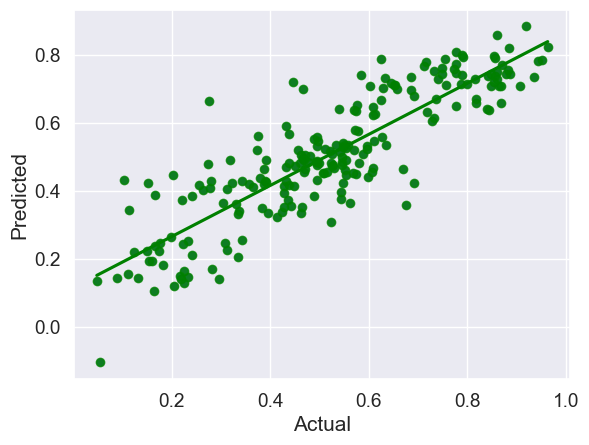

In [58]:

# Set X_test and y_test
X_test = df_test[selected_features['manual_automated_RFE']]
y_test = df_test['cnt']

# Add a constant
X_test_sm = sm.add_constant(X_test)

# Predict
y_test_pred = lr_model.predict(X_test_sm)

# Evaluate accuracy
r2_score_of_model = r2_score(y_true = y_test, y_pred = y_test_pred) 
percentage_of_r2_score_of_model = round(r2_score_of_model * 100, 2)

print('The accuracy of the model with 70% training and 30% test set is : ', percentage_of_r2_score_of_model, '%')

# Plot the scatter plot of test data against prediction and show the regression line
sns.scatterplot(x = y_test, y = y_test_pred)
sns.regplot(x = y_test, y = y_test_pred ,ci=None, color ='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### <font color='green'> The accuracy of the model built using RFE with manual feature elimination with 70% training 30% test set and 10 features is 75.10%.

In [59]:

print('Features selected with Manual, Automated, Automated and Manual approach\n')

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in selected_features.items() ]))
#df.sort_values(by=['manual','automated_RFE','manual_automated_RFE'], ascending = True)
df

Features selected with Manual, Automated, Automated and Manual approach



manual automated_RFE manual_automated_RFE
0             yr       holiday               monday
1     workingday           hum            september
2      windspeed          july               spring
3         spring     september               summer
4         summer        spring         weathersit_2
5       december        summer         weathersit_3
6        january          temp            windspeed
7       november  weathersit_2               winter
8      september  weathersit_3           workingday
9         monday     windspeed                   yr
10  weathersit_2        winter                  NaN
11  weathersit_3            yr                  NaN

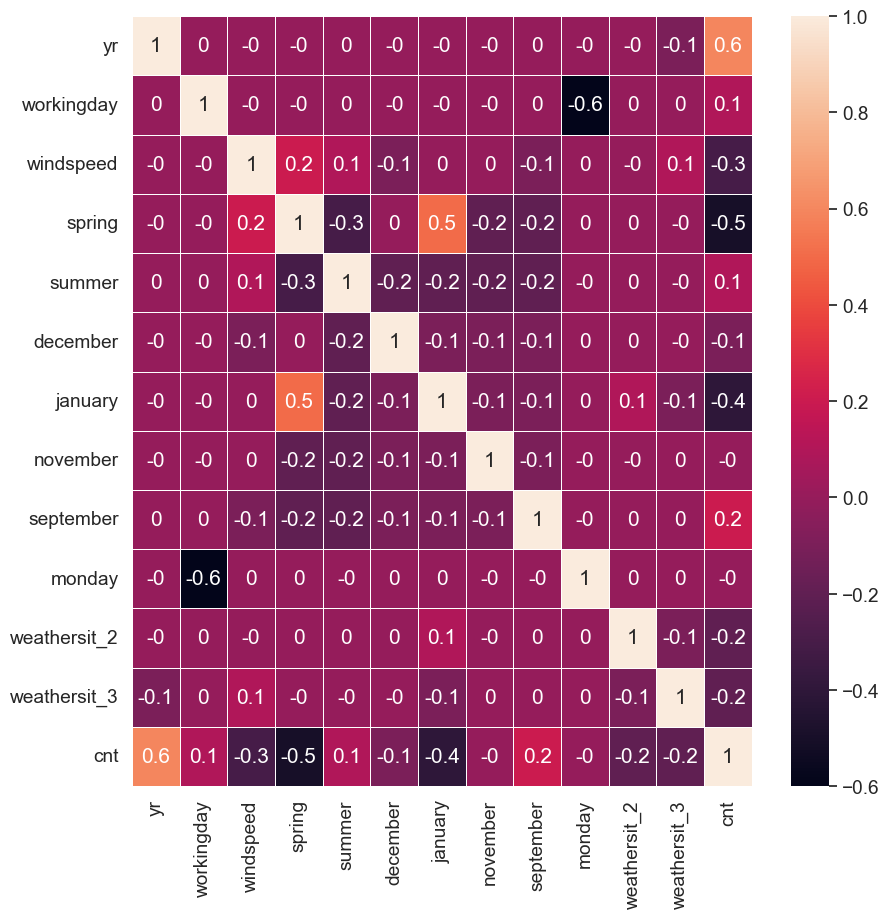

In [60]:

df_corr = df_train[selected_features['manual']]
df_corr['cnt'] = df_train['cnt']

fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(round(df_corr.corr(),1), annot=True, linewidths=.5, ax=ax)

plt.show()

# <font color='Orange'> Interpretation </font>
1. Automated RFE with 12 features and 81.52% accuracy has Humidity and Temperature features with VIF > 5. As we know Humidity and Temperature are dependent with each other inversly and at aleast one of which should not be considered for the model. Also, these are dependent with seasons, which are also in the features list selected by RFE. This model is not going to be a good predictor in reality or can perform poorly. So, we reject it.
2. The model built through manual approach is 78.52% accurate with 12 features and we can see all the 10 features selected through Automated(coarse tuning) + manual (fine tuning) approach are in the pure Manual model.
3. Considering 75.10% accuracy of Automated(coarse tuning) + manual (fine tuning) approach with 10 features and 78.52% accuracy of pure Manual approach. I would recommend and feel pretty comfortable to go with the Model built through Manual approach with 2 more extra features.

#### <font color='green'> Equation of the best fitted linear regression predidictive model to predict the shared bikes demand with 12 feature selected from the data set given is,<font>


### <font color='blue'>$ SharedBikeCount \, = \, 0.5348 + \,0.2461 * yr\, + \,0.0571 * workingday\, - \,0.1926 *  windspeed\, - \, 0.2376 * spring\, - \,0.0385 * summer\,  -  \,0.1232 * january\, +\,0.0563 * september\, - \,0.1122 * november\, - \,0.1183 * december\, + \,0.0664 * monday\, -\,0.0890 * weathersit_2\, - \, 0.3202 * weathersit_3$ </font>

NOTE: 
* weathersit_2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
* weathersit_3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* january, september, november, december are the categories of the feature mnth with values 1, 9, 11, 12 respectively.
* summer and spring are categories of season with category value 1 and 2 in the data set
* monday refers to value 6 in the weekday feature in the data set

### <font color='Orange'> The linear regression model is 78.52% accurate with 70% training and 30% test data set </font>